In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import csv into a dataframe
car_sales = pd.read_csv(r"C:\Users\Nick\Desktop\used-cars-sales-analysis\used_cars_sales_cleaned.csv")
column_names = ['ID', 'pricesold', 'yearsold', 'zipcode', 'Mileage', 'Make', 'Model', 'Year', 'make_clean', 'make_norm']

# fix column names
old_header = car_sales.columns.tolist()
car_sales.loc[len(car_sales)] = old_header
car_sales.columns = column_names

# replace Null values with NaN
car_sales = car_sales.replace("\\N", np.nan)

# drop make_clean and make_norm columns
car_sales.drop(['Make', 'make_norm'], axis=1, inplace=True)
car_sales.rename(columns={'make_clean':'Make'}, inplace=True)

# adjsut Dtype of columns
car_sales['pricesold'] = pd.to_numeric(car_sales['pricesold'], errors='coerce')
car_sales['yearsold'] = pd.to_numeric(car_sales['yearsold'], errors='coerce')
car_sales['Mileage'] = pd.to_numeric(car_sales['Mileage'], errors='coerce')
car_sales['Year'] = pd.to_numeric(car_sales['Year'].str[:4], errors='coerce')

# remove Year outlier
car_sales = car_sales.drop(100044)

In [6]:
# initial peek at the data
car_sales.head(20)

,ID,pricesold,yearsold,zipcode,Mileage,Model,Year,Make
0,96705,15000.0,2019,810,NaN,Jaguar Beck Lister,1958.0,Replica/Kit
1,119660,8750.0,2020,334,55000.0,XJS,1995.0,Jaguar
2,80773,11600.0,2019,078,97200.0,Mustang,1968.0,Ford
3,64287,44000.0,2019,077,40703.0,911,2002.0,Porsche
4,132695,NaN,2020,462,71300.0,Montclair,1965.0,Mercury
5,132829,NaN,2020,105,71300.0,Montclair,1965.0,Mercury
6,5250,70000.0,2019,076,6500.0,Defender,1997.0,Land Rover
7,29023,1330.0,2019,070,167000.0,Civic,2001.0,Honda
8,80293,25200.0,2019,337,15000.0,GTO,1970.0,Pontiac
9,158271,20000.0,2020,333,51674.0,Wrangler,2015.0,Jeep


In [7]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120911 entries, 0 to 120911
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         120911 non-null  object 
 1   pricesold  112219 non-null  float64
 2   yearsold   120911 non-null  int64  
 3   zipcode    119291 non-null  object 
 4   Mileage    113951 non-null  float64
 5   Model      120527 non-null  object 
 6   Year       120824 non-null  float64
 7   Make       120911 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 8.3+ MB


In [8]:
#average used car profile
print(f'The average car price is: ${car_sales["pricesold"].mean(): .0f}.')
print(f'The average car mileage is: {car_sales["Mileage"].mean(): .0f} miles.')
print(f'The average age of a car is: {(car_sales["yearsold"] - car_sales["Year"]).mean(): .0f}.')
print(f'The 3 most popular car brands are: {', '.join(car_sales["Make"].value_counts().head(3).index.tolist())}.')

The average car price is: $ 11604.
The average car mileage is:  99945 miles.
The average age of a car is:  26.
The 3 most popular car brands are: Ford, Chevrolet, Toyota.


These averages should be interpreted with caution. eBay is a marketplace heavily used by private sellers, which naturally biases the dataset toward older vehicles compared to dealer inventory. Additionally, the presence of classic and antique cars in the listings skews the age and mileage distributions upward, leading to a higher average age (26 years) and mileage (nearly 100,000 miles) than what might be expected in the broader U.S. used car market.

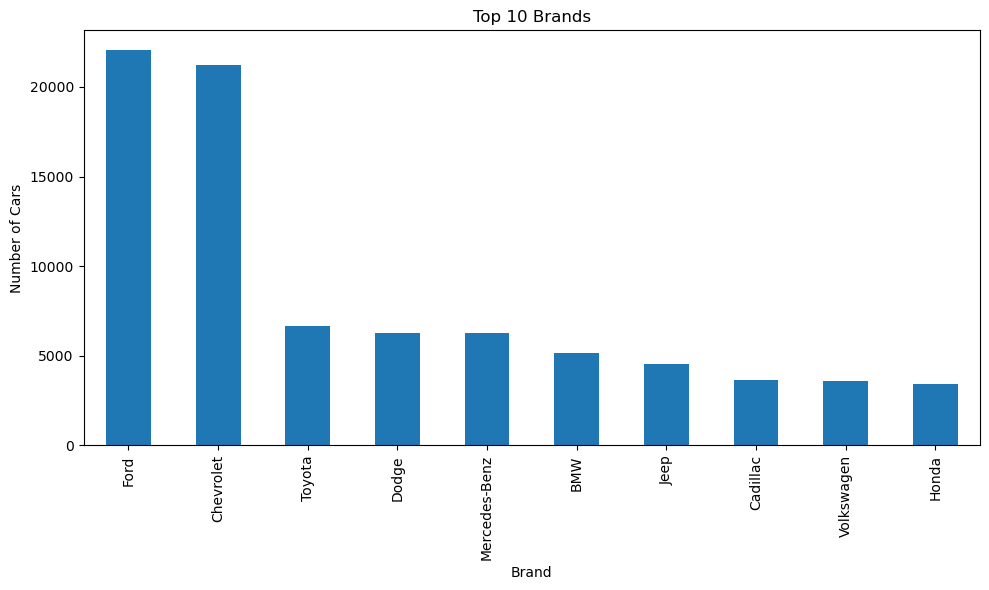

In [9]:
top_10_brands_barplot = car_sales["Make"].value_counts().head(10).plot(kind="bar", figsize=(10,6), title="Top 10 Brands")
plt.xlabel("Brand"); plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()

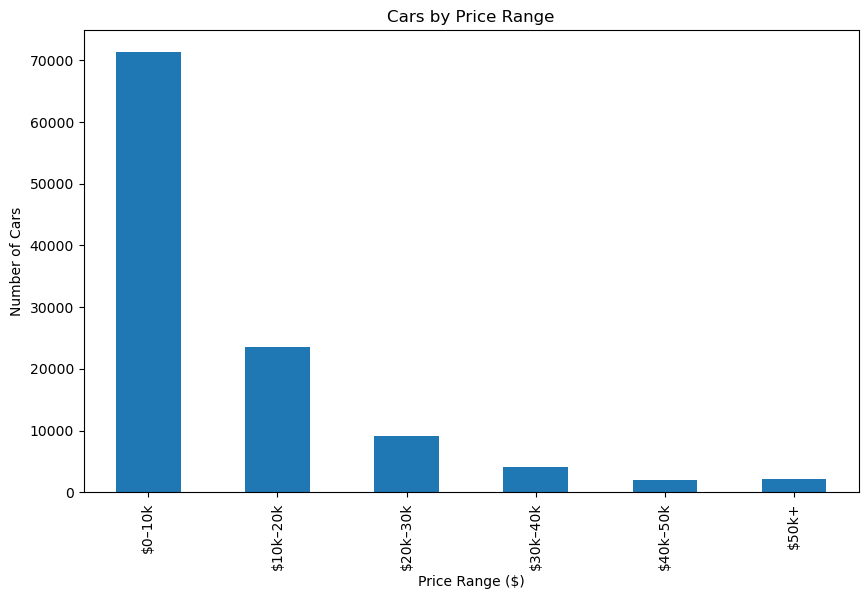

In [33]:
bins = [0, 10000, 20000, 30000, 40000, 50000, float("inf")]
labels = ["$0–10k", "$10k–20k", "$20k–30k", "$30k–40k", "$40k–50k", "$50k+"]

# Assign each row into a price bin
car_sales["Price_range"] = pd.cut(car_sales["pricesold"], bins=bins, labels=labels, include_lowest=True)

# Count and plot
car_sales["Price_range"].value_counts().sort_index().plot(
    kind="bar", figsize=(10,6), title="Cars by Price Range")
plt.xlabel("Price Range ($)")
plt.ylabel("Number of Cars")
plt.show()